# LangGraph Agent
## Without tools

## Library Imports

In [1]:
from langchain_core.messages import HumanMessage
from langchain_anthropic import ChatAnthropic
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, START, StateGraph, MessagesState
import logging
from IPython.display import Image, Markdown, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

## Configure logging

In [2]:
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging.basicConfig(
    filename='langgraph_notebook.log',  
    level=logging.INFO,
)

## Configure Agent and Model

In [3]:
model = ChatAnthropic(model="claude-3-5-sonnet-20240620", temperature=0)

def call_model(state: MessagesState):
    messages = state['messages']
    response = model.invoke(messages)
    return {"messages": [response]}

workflow = StateGraph(MessagesState)

workflow.add_node("agent", call_model)

workflow.add_edge(START, "agent")

checkpointer = MemorySaver()

app = workflow.compile(checkpointer=checkpointer)

## Visualize the Graph

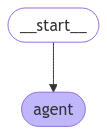

In [4]:
display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

## Chat with the Agent

In [5]:
final_state = app.invoke(
    {"messages": [HumanMessage(content="What teams did Joe Montana play for?")]},
    config={"configurable": {"thread_id": 99}}
)
display(Markdown(final_state["messages"][-1].content))

Joe Montana played for two NFL teams during his professional football career:

1. San Francisco 49ers (1979-1992): Montana spent the majority of his career with the 49ers, where he became a legend and won four Super Bowls (XVI, XIX, XXIII, and XXIV).

2. Kansas City Chiefs (1993-1994): After being traded by the 49ers, Montana played his final two NFL seasons with the Chiefs.

Before his professional career, Montana played college football for the University of Notre Dame from 1975 to 1978.

In [6]:
final_state = app.invoke(
    {"messages": [HumanMessage(content="What are the leagues in the SportsWorldCentral fantasy football platform?")]},
    config={"configurable": {"thread_id": 99}}
)
display(Markdown(final_state["messages"][-1].content))

I apologize, but I don't have any specific information about leagues in a fantasy football platform called "SportsWorldCentral". Fantasy football platforms can vary widely in their league structures and offerings, and I'm not familiar with this particular one. If this is a real platform, you may need to check their website or contact their customer support for accurate information about their league types and structures. If you have a question about fantasy football leagues in general, I'd be happy to provide information about common league types found on major platforms.

In [ ]:
final_state = app.invoke(
    {"messages": [HumanMessage(content="What are the leagues in the MyFantasyLeague fantasy football platform?")]},
    config={"configurable": {"thread_id": 99}}
)
display(Markdown(final_state["messages"][-1].content))